The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [44]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## EDA and Data Preprocessing

In [45]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The max values of different features range from 1 to 891, which means we will have to perform Feature Scaling

In [46]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [48]:
#Check if null values are present
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The column 'Cabin' had 687 has more than half values as missing, so there is no point in considering it. We will simply drop this feature

In [49]:
df.drop('Cabin',axis=1,inplace=True)

We will replace missing values in 'Age' with its mean

In [50]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

Remove the remaining('Embarked') rows containing missing values

In [51]:
df.dropna(inplace=True)

### Numerical Features

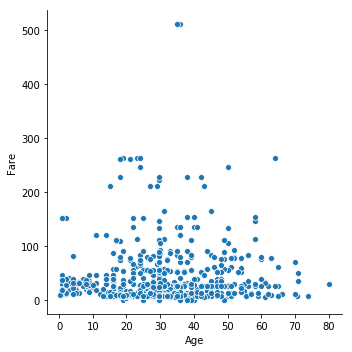

In [52]:
sns.relplot(x='Age',y='Fare',data=df)

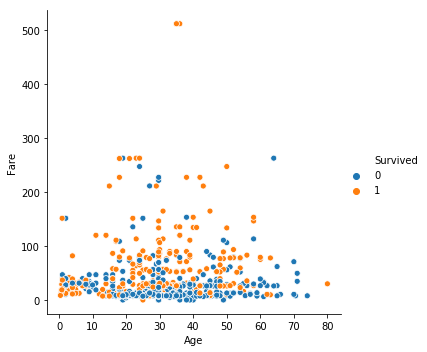

In [53]:
sns.relplot(x='Age',y='Fare',data=df,hue='Survived')

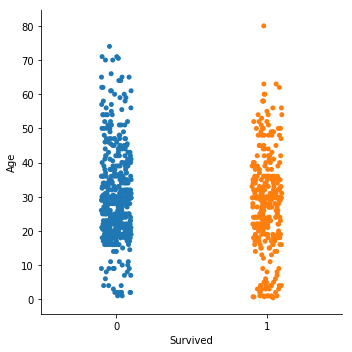

In [54]:
sns.catplot(x='Survived',y='Age',data = df)

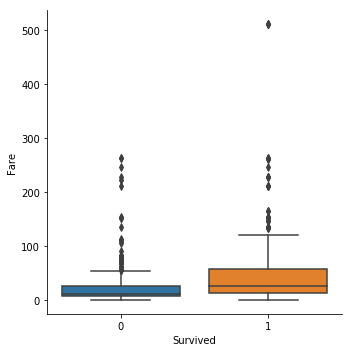

In [55]:
sns.catplot(x='Survived',y='Fare',data = df,kind='box')

From the above plots, we see that it is queit difficult to separate the 'Survived' classes based on 'Age' and 'Fare'

### Categorical Features

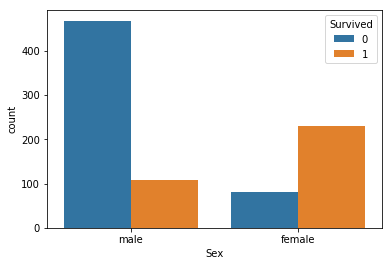

In [56]:
sns.countplot(x="Sex", data=df,hue='Survived')

The percentage of Female survivors was more.

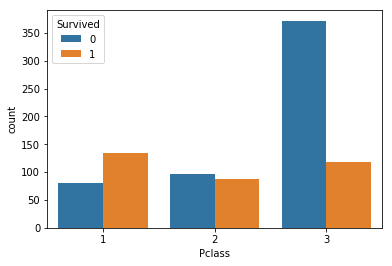

In [57]:
sns.countplot(x="Pclass", data=df,hue='Survived')

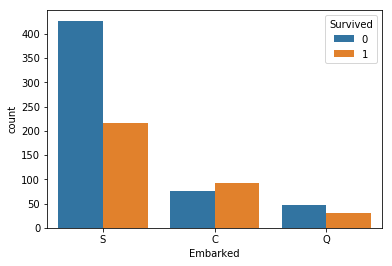

In [58]:
sns.countplot(x="Embarked", data=df,hue='Survived')

C:\Users\aruni\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


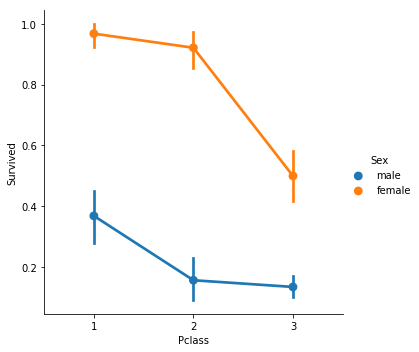

In [59]:
sns.catplot(x='Pclass',y='Survived',data=df,kind='point',hue='Sex')

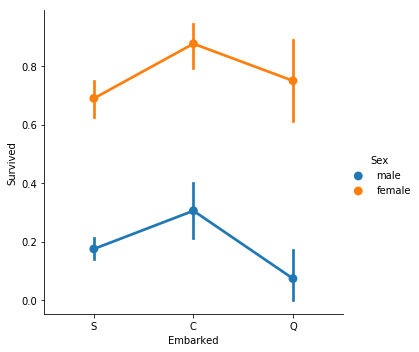

In [60]:
sns.catplot(x='Embarked',y='Survived',data=df,kind='point',hue='Sex')

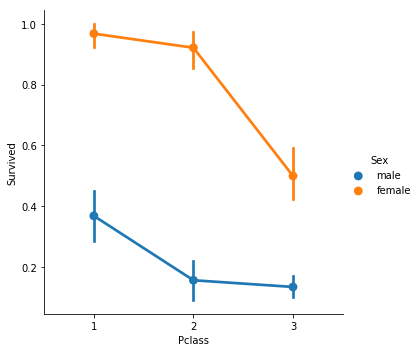

In [61]:
sns.catplot(x='Pclass',y='Survived',data=df,kind='point',hue='Sex')

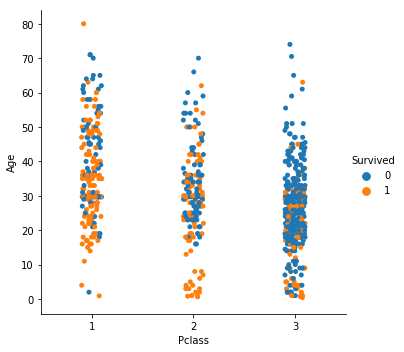

In [62]:
sns.catplot(x = 'Pclass',y='Age',data=df,kind='strip',hue='Survived')

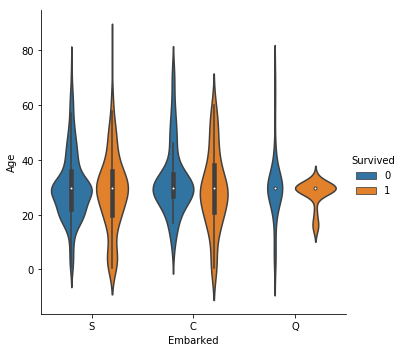

In [63]:
sns.catplot(x = 'Embarked',y='Age',data=df,kind='violin',hue='Survived')

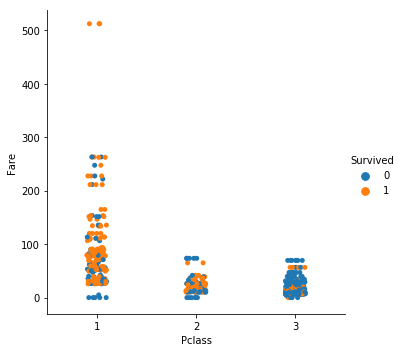

In [64]:
sns.catplot(x = 'Pclass',y='Fare',data=df,kind='strip',hue='Survived')

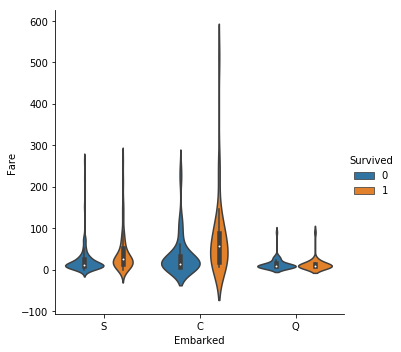

In [65]:
sns.catplot(x = 'Embarked',y='Fare',data=df,kind='violin',hue='Survived')

From the plots, we can infer that Gender is a strong indicator of whether a person will survive or not

In [66]:
df['Sex'].replace({'male':0,'female':1},inplace=True)
df['Embarked'].replace({'S':0,'C':1,'Q':2},inplace=True)

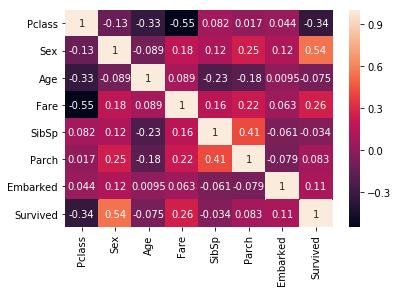

In [67]:
sns.heatmap(df[['Pclass','Sex','Age','Fare','SibSp','Parch','Embarked','Survived']].corr(), annot=True)

The highest correlation with Survived is from Sex which is 0.54, while other features are not correlated much with the target variable

In [68]:
X = df[['Pclass','Sex','Age','Fare','SibSp','Parch','Embarked']]
y = df['Survived']

In [69]:
# Apply Feature Scaling
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

C:\Users\aruni\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


array([[ 0.82520863, -0.73534203, -0.59049493, -0.50023975,  0.43135024,
        -0.47432585, -0.56968402],
       [-1.57221121,  1.35991138,  0.64397101,  0.78894661,  0.43135024,
        -0.47432585,  1.00313924],
       [ 0.82520863,  1.35991138, -0.28187844, -0.48664993, -0.47519908,
        -0.47432585, -0.56968402],
       [-1.57221121,  1.35991138,  0.41250865,  0.42286111,  0.43135024,
        -0.47432585, -0.56968402],
       [ 0.82520863, -0.73534203,  0.41250865, -0.4841333 , -0.47519908,
        -0.47432585, -0.56968402]])

In [70]:
# Split the data into train and valid a.k.a. test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
print('Training set shape: ', X_train.shape, y_train.shape)
print('Testing set shape: ', X_test.shape, y_test.shape)

Training set shape:  (666, 7) (666,)
Testing set shape:  (223, 7) (223,)


In [71]:
# Function definition for fitting data
def model_fit(model,X, y,test):
    model.fit(X,y)
    y_pred = model.predict(test)
    return y_pred

In [72]:
# Function for calculating accuracy
def accuracy(Y, y):
    return metrics.accuracy_score(Y,y)

In [73]:
# Function for GridSearch
def grid_search(model,params,cv_val,X,y):
    gs = GridSearchCV(model, params, verbose = 1, cv=cv_val, n_jobs = -1)
    gs.fit(X_train,y_train)
    return gs

### KNN

In [74]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 4)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

In [75]:
from sklearn import metrics

In [76]:
mean_acc = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat= knn.predict(X_test)
    mean_acc[i-1] = metrics.accuracy_score(y_test, yhat)

mean_acc

array([0.76681614, 0.75336323, 0.74887892, 0.75784753, 0.75784753,
       0.76681614, 0.77578475, 0.78026906, 0.77578475, 0.78026906,
       0.77578475, 0.78475336, 0.77578475, 0.78923767, 0.78475336,
       0.78475336, 0.78475336, 0.78475336, 0.78475336, 0.78026906])

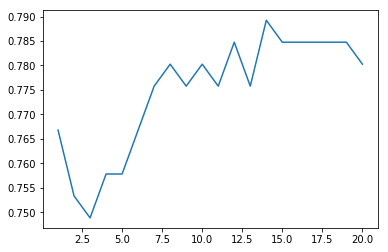

In [78]:
import matplotlib.pyplot as plt
plt.plot(range(1,21),mean_acc)

In [82]:
from sklearn.model_selection import GridSearchCV

In [83]:
grid_params = {'n_neighbors' : [7,9,11,13,15,17], 
               'weights' : ['uniform','distance'],
               'algorithm' : ['brute','kd_tree','ball_tree'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [84]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [85]:
g_res = grid_search(KNeighborsClassifier(), grid_params, 3,X_train,y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:    5.0s finished


In [86]:
g_res.best_score_

0.8333333333333334

In [87]:
g_res.best_params_

{'algorithm': 'brute',
 'metric': 'manhattan',
 'n_neighbors': 9,
 'weights': 'uniform'}

In [88]:
knn = KNeighborsClassifier(metric='manhattan',n_neighbors=9)
knn.fit(X_train,y_train)
y_knn = model_fit(knn,X_train,y_train,X_test)

In [89]:
metrics.accuracy_score(y_test, y_knn)

0.7668161434977578

In [90]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_knn))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       132
           1       0.76      0.63      0.69        91

   micro avg       0.77      0.77      0.77       223
   macro avg       0.77      0.75      0.75       223
weighted avg       0.77      0.77      0.76       223



In [91]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, X , y, cv = 5)
scores

array([0.80898876, 0.79213483, 0.8258427 , 0.81460674, 0.83050847])

### SVMs

In [92]:
from sklearn import svm
clf2 = svm.SVC(C = 0.1)
clf2

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [93]:
grid_params = {'C' : [0.01,0.1,1,10], 'kernel' : ['rbf','linear']}
gs = grid_search(clf2, grid_params, 3,X_train, y_train)
gs.best_score_

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    0.3s finished
C:\Users\aruni\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.8483483483483484

In [94]:
gs.best_params_

{'C': 1, 'kernel': 'rbf'}

In [95]:
clf2 = svm.SVC(C=1)
y_svm = model_fit(clf2,X_train,y_train,X_test)
y_svm2 = model_fit(clf2,X_train,y_train,X_train)
print("Train score: ", accuracy(y_train,y_svm2)," Test score: ",accuracy(y_test,y_svm))

Train score:  0.8618618618618619  Test score:  0.7802690582959642


C:\Users\aruni\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\aruni\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [96]:
scores = cross_val_score(clf2, X , y, cv = 5)
scores

C:\Users\aruni\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\aruni\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\aruni\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\aruni\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

array([0.83146067, 0.83146067, 0.81460674, 0.80337079, 0.87570621])

### Decision Trees

In [97]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
clf3 = DecisionTreeClassifier(random_state=42,criterion = 'gini', max_depth = 4)
clf3

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [98]:
grid_params = {'max_depth' : [3,4,5],'criterion' : ['gini','entropy']}
gs = grid_search(clf3, grid_params, 3,X_train, y_train)
gs.best_score_

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.1s finished


0.8273273273273273

In [99]:
gs.best_params_

{'criterion': 'gini', 'max_depth': 5}

In [100]:
clf3 = DecisionTreeClassifier(random_state=42,criterion = 'entropy', max_depth = 5)
y_tree = model_fit(clf3,X_train,y_train, X_test)
y_tree2 = model_fit(clf3,X_train,y_train, X_train)

In [101]:
print("Train score: ", accuracy(y_train,y_tree2)," Test score: ",accuracy(y_test,y_tree))

Train score:  0.8588588588588588  Test score:  0.7847533632286996


In [102]:
scores = cross_val_score(clf3, X , y, cv = 5)
scores

array([0.81460674, 0.80337079, 0.81460674, 0.78089888, 0.85310734])

### RFs


In [103]:
from sklearn.ensemble import RandomForestClassifier
clf4 = RandomForestClassifier(random_state = 42, max_depth = 4)
clf4

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [104]:
grid_params = {'max_depth' : [3,4,5],'criterion' : ['gini','entropy']}
gs = grid_search(clf4, grid_params, 3,X_train, y_train)
gs.best_score_

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.2s finished
C:\Users\aruni\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8288288288288288

In [105]:
gs.best_params_

{'criterion': 'gini', 'max_depth': 5}

In [106]:
clf4 = RandomForestClassifier(random_state = 42, max_depth = 5,criterion = 'entropy')
y_rf = model_fit(clf4,X_train,y_train, X_test)
y_rf2 = model_fit(clf4,X_train,y_train, X_train)
print("Train score: ", accuracy(y_train,y_rf2)," Test score: ",accuracy(y_test,y_rf))

Train score:  0.8648648648648649  Test score:  0.7757847533632287


C:\Users\aruni\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [107]:
scores = cross_val_score(clf4, X , y, cv = 5)
scores

array([0.83707865, 0.80898876, 0.8258427 , 0.78651685, 0.83615819])

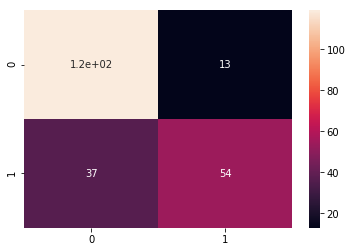

In [108]:
sns.heatmap(confusion_matrix(y_test, y_rf), annot = True)

In [109]:
print(classification_report(y_test, y_rf))

              precision    recall  f1-score   support

           0       0.76      0.90      0.83       132
           1       0.81      0.59      0.68        91

   micro avg       0.78      0.78      0.78       223
   macro avg       0.78      0.75      0.75       223
weighted avg       0.78      0.78      0.77       223



### Logistic Regression

In [110]:
from sklearn.linear_model import LogisticRegression
clf5 = LogisticRegression(C = 0.1, solver = 'newton-cg')
clf5

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [111]:
grid_params = {'C' : [0.01,0.1,1,10],'solver' : ['liblinear','saga','lbfgs','newton-cg']}
gs = grid_search(clf5, grid_params, 3,X_train, y_train)
gs.best_score_

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    0.2s finished


0.8258258258258259

In [112]:
gs.best_params_

{'C': 0.1, 'solver': 'saga'}

In [113]:
clf5 = LogisticRegression(C = 0.1, solver = 'newton-cg')
y_lr = model_fit(clf5,X_train,y_train, X_test)
y_lr2 = model_fit(clf5,X_train,y_train, X_train)
print("Train score: ", accuracy(y_train,y_lr2)," Test score: ",accuracy(y_test,y_lr))

Train score:  0.8198198198198198  Test score:  0.757847533632287


In [114]:
scores = cross_val_score(clf5, X , y, cv = 5)
scores

array([0.78089888, 0.79213483, 0.79213483, 0.76404494, 0.83050847])

### GBC

In [115]:
from sklearn.ensemble import GradientBoostingClassifier
gbk = GradientBoostingClassifier(max_depth = 3, n_estimators = 50, learning_rate = 0.01)
gbk

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=50,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [116]:
grid_params = {'max_depth' : [3,4,5],'n_estimators' : [50,100,200,500],'learning_rate' : [0.01,0.1,1,10,100]}
gs = grid_search(gbk, grid_params, 3,X_train, y_train)
gs.best_score_

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   16.8s finished


0.8408408408408409

In [117]:
gs.best_params_

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}

In [118]:
gbk = GradientBoostingClassifier(max_depth = 3, n_estimators = 100, learning_rate = 0.1)
y_gbk = model_fit(gbk, X_train, y_train, X_test)
y_gbk2 = model_fit(gbk, X_train, y_train, X_train)
print("Train score: ", accuracy(y_train,y_gbk2)," Test score: ",accuracy(y_test,y_gbk))

Train score:  0.9099099099099099  Test score:  0.7847533632286996


In [119]:
scores = cross_val_score(gbk, X , y, cv = 5)
scores

array([0.80898876, 0.80898876, 0.84269663, 0.80337079, 0.85310734])

### Ada Boosting Classifier

In [120]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(base_estimator = clf3, n_estimators = 100, learning_rate = 0.01, random_state = 42)
ada

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
          learning_rate=0.01, n_estimators=100, random_state=42)

In [121]:
y_ada = model_fit(ada, X_train, y_train, X_test)
y_ada2 = model_fit(ada, X_train, y_train, X_train)
print("Train score: ", accuracy(y_train, y_ada2)," Test score: ",accuracy(y_test, y_ada))

Train score:  0.9624624624624625  Test score:  0.7892376681614349


In [122]:
scores = cross_val_score(ada, X , y, cv = 5)
scores

array([0.80898876, 0.81460674, 0.84831461, 0.79213483, 0.85875706])

### Bagging Classifier

In [123]:
from sklearn.ensemble import BaggingClassifier
bg = BaggingClassifier(base_estimator = clf3, n_estimators = 50,random_state =42)
bg

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=50, n_jobs=None, oob_score=False,
         random_state=42, verbose=0, warm_start=False)

In [124]:
y_bg = model_fit(bg, X_train, y_train, X_test)
y_bg2 = model_fit(bg, X_train, y_train, X_train)
print("Train score: ", accuracy(y_train, y_bg2)," Test score: ",accuracy(y_test, y_bg))

Train score:  0.8738738738738738  Test score:  0.7892376681614349


In [125]:
scores = cross_val_score(bg, X , y, cv = 5)
scores

array([0.80898876, 0.82022472, 0.83146067, 0.78089888, 0.84745763])

## Importing Test Data

In [126]:
test = pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [127]:
test['Sex'].replace({'male':0,'female':1},inplace=True)
test['Embarked'].replace({'S':0,'C':1,'Q':2},inplace=True)
test['Age'].fillna(test['Age'].mean(),inplace=True)
test['Fare'].fillna(test['Fare'].mean(),inplace=True)
test.shape

(418, 11)

In [128]:
test_X = test[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
test_X.shape

(418, 7)

In [129]:
from sklearn.preprocessing import StandardScaler
test_X = StandardScaler().fit(test_X).transform(test_X.astype(float))
test_X[0:5]

C:\Users\aruni\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


array([[ 0.87348191, -0.75592895,  0.3349926 , -0.49947002, -0.4002477 ,
        -0.49840706,  2.24316522],
       [ 0.87348191,  1.32287566,  1.32553003,  0.61699237, -0.4002477 ,
        -0.51327429, -0.6778412 ],
       [-0.31581919, -0.75592895,  2.51417495, -0.49947002, -0.4002477 ,
        -0.46508846,  2.24316522],
       [ 0.87348191, -0.75592895, -0.25932986, -0.49947002, -0.4002477 ,
        -0.48346631, -0.6778412 ],
       [ 0.87348191,  1.32287566, -0.65554483,  0.61699237,  0.61989583,
        -0.41847148, -0.6778412 ]])

In [130]:
y_pred = model_fit(bg, X, y, test_X)
y_self = model_fit(bg, X, y, X)
print("Train score: ", accuracy(y, y_self))

Train score:  0.8582677165354331


In [131]:
output = pd.DataFrame(y_pred)
output[0].value_counts()

0    283
1    135
Name: 0, dtype: int64

In [132]:
output = pd.concat([test['PassengerId'], output],axis = 1)
output

,PassengerId,0
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [133]:
output.rename(columns = {0:'Survived'}, inplace = True)
output.columns

Index(['PassengerId', 'Survived'], dtype='object')

In [134]:
output.to_csv('./Predictions/predictions.csv',index = False)

In [135]:
output.shape

(418, 2)